## Explanation

- What is TLC recording
- What are the original fhv datasets showing (from 2015 to 01-2019)
- What was added in 02/2019
- Difference between hvfhv and fhv 
- How to retrieve Uber and Lyft data by looking at hvfhv (which has licenses for Uber and Lyft)
- How to merge in annual records
- Number of datasets: 4 providers (yellow, green, uber, lyft) * 6 years (from 2015 to 2020)

In [2]:
import pandas as pd
import numpy as np
# import geopandas as gpd
import urllib.request
import urllib
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

In [33]:
# yellow0721_example = pd.read_csv("yellow_tripdata_2021-07.csv")

In [1]:
# yellow0721_example['tpep_pickup_datetime'] = pd.to_datetime(yellow0721_example['tpep_pickup_datetime'])

# yellow0721_example['date'] = yellow0721_example['tpep_pickup_datetime'].dt.date
# yellow0721_example = yellow0721_example.groupby(['date']).agg({'tpep_pickup_datetime':'count'})
# yellow0721_example

In [35]:
# green0721_example = pd.read_csv("green_tripdata_2021-07.csv")

In [2]:
# green0721_example['lpep_pickup_datetime'] = pd.to_datetime(green0721_example['lpep_pickup_datetime'])

# green0721_example['date'] = green0721_example['lpep_pickup_datetime'].dt.date
# green0721_example = green0721_example.groupby(['date']).agg({'lpep_pickup_datetime':'count'})
# green0721_example

In [37]:
# fhv0721_example = pd.read_csv("fhv_tripdata_2021-07.csv")

In [3]:
# fhv0721_example['pickup_datetime'] = pd.to_datetime(fhv0721_example['pickup_datetime'])

# fhv0721_example['date'] = fhv0721_example['pickup_datetime'].dt.date
# fhv0721_example = fhv0721_example.groupby(['date']).agg({'pickup_datetime':'count'})
# fhv0721_example

In [39]:
# hvfhs0721_example = pd.read_csv("fhvhv_tripdata_2021-07.csv")

In [4]:
# hvfhs0721_example['pickup_datetime'] = pd.to_datetime(hvfhs0721_example['pickup_datetime'])

# hvfhs0721_example['date'] = hvfhs0721_example['pickup_datetime'].dt.date
# hvfhs0721_example = hvfhs0721_example.groupby(['date']).agg({'pickup_datetime':'count'})
# hvfhs0721_example

In [27]:
# yellow0119_example = pd.read_csv("yellow_tripdata_2019-01.csv")

In [5]:
# yellow0119_example['tpep_pickup_datetime'] = pd.to_datetime(yellow0119_example['tpep_pickup_datetime'])

# yellow0119_example['date'] = yellow0119_example['tpep_pickup_datetime'].dt.date
# yellow0119_example = yellow0119_example.groupby(['date']).agg({'tpep_pickup_datetime':'count'})
# yellow0119_example

In [29]:
# green0119_example = pd.read_csv("green_tripdata_2019-01.csv")

In [6]:
# green0119_example['lpep_pickup_datetime'] = pd.to_datetime(green0119_example['lpep_pickup_datetime'])

# green0119_example['date'] = green0119_example['lpep_pickup_datetime'].dt.date
# green0119_example = green0119_example.groupby(['date']).agg({'lpep_pickup_datetime':'count'})
# green0119_example

In [31]:
# fhv0119_example = pd.read_csv("fhv_tripdata_2019-01.csv")

In [7]:
# fhv0119_example['pickup_datetime'] = pd.to_datetime(fhv0119_example['pickup_datetime'])

# fhv0119_example['date'] = fhv0119_example['pickup_datetime'].dt.date
# fhv0119_example = fhv0119_example.groupby(['date']).agg({'pickup_datetime':'count'})
# fhv0119_example

In [15]:
# yellow0121_example = pd.read_csv("yellow_tripdata_2021-01.csv")

In [8]:
# yellow0121_example['tpep_pickup_datetime'] = pd.to_datetime(yellow0121_example['tpep_pickup_datetime'])

# yellow0121_example['date'] = yellow0121_example['tpep_pickup_datetime'].dt.date
# yellow0121_example = yellow0121_example.groupby(['date']).agg({'tpep_pickup_datetime':'count'})
# yellow0121_example

In [4]:
# green0121_example = pd.read_csv("green_tripdata_2021-01.csv")

In [9]:
# green0121_example['lpep_pickup_datetime'] = pd.to_datetime(green0121_example['lpep_pickup_datetime'])

# green0121_example['date'] = green0121_example['lpep_pickup_datetime'].dt.date
# green0121_example = green0121_example.groupby(['date']).agg({'lpep_pickup_datetime':'count'})
# green0121_example

In [5]:
# fhv0121_example = pd.read_csv("fhv_tripdata_2021-01.csv")

In [10]:
# fhv0121_example['pickup_datetime'] = pd.to_datetime(fhv0121_example['pickup_datetime'])

# fhv0121_example['date'] = fhv0121_example['pickup_datetime'].dt.date
# fhv0121_example = fhv0121_example.groupby(['date']).agg({'pickup_datetime':'count'})
# fhv0121_example

In [6]:
# hvfhs0121_example = pd.read_csv("fhvhv_tripdata_2021-01.csv")

In [11]:
# hvfhs0121_example['pickup_datetime'] = pd.to_datetime(hvfhs0121_example['pickup_datetime'])

# hvfhs0121_example['date'] = hvfhs0121_example['pickup_datetime'].dt.date
# hvfhs0121_example = hvfhs0121_example.groupby(['date']).agg({'pickup_datetime':'count'})
# hvfhs0121_example

In [12]:
# print ('yellow data shape:', len(yellow0121_example), 'green data shape:', \
#        len(green0121_example), 'FHV data shape:', len(fhv0121_example),\
#        'HVFHS taxi:', len(hvfhs0121_example), '\n Total ridership count:', (len(yellow0121_example)+\
#                                                                             (len(green0121_example))+\
#                                                                            (len(fhv0121_example))+\
#                                                                            (len(hvfhs0121_example))))

In [3]:
# Download an example dataset for high volume fhv (March 2019)
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2019-03.csv'
response = urllib.request.urlopen(url)
html = response.read()
with open("fhvhv_example.csv", 'wb') as f:
    f.write(html)

fhvhv_example = pd.read_csv("fhvhv_example.csv")

In [4]:
fhvhv_example

In [5]:
# Check the dispatching base numbers associated with Uber license number (HV0003)
uber_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] == 'HV0003']
uber_example_disp = uber_example["dispatching_base_num"].unique()
uber_example_disp

In [6]:
# Check if other providers apart from Uber have the same license numbers 
non_uber_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] != 'HV0003']
non_uber_example_disp = non_uber_example["dispatching_base_num"].unique()
np.in1d(uber_example_disp, non_uber_example_disp).any()

In [7]:
# Check the dispatching base numbers associated with Lyft license number (HV0005)
lyft_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] == 'HV0005']
lyft_example_disp = lyft_example["dispatching_base_num"].unique()

In [8]:
# Check if other providers apart from Lyft have the same license numbers 
non_lyft_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] != 'HV0005']
non_lyft_example_disp = non_lyft_example["dispatching_base_num"].unique()
np.in1d(lyft_example_disp, non_lyft_example_disp).any()

## Just run these 2 cells

In [9]:
import pandas as pd
import numpy as np
import urllib.request
import urllib

# Download an example dataset for high volume fhv (March 2019)
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2019-03.csv'
response = urllib.request.urlopen(url)
html = response.read()
with open("fhvhv_example.csv", 'wb') as f:
    f.write(html)

fhvhv_example = pd.read_csv("fhvhv_example.csv")

# find dispatching base numbers associated with uber
uber_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] == 'HV0003']
uber_example_disp = uber_example["dispatching_base_num"].unique()

# find dispatching base numbers associated with lyft
lyft_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] == 'HV0005']
lyft_example_disp = lyft_example["dispatching_base_num"].unique()

In [10]:
def download_tlc_data(year):
    
    categories_1 = ["yellow", "green", "fhv"]
    categories_2 = ["yellow", "green", "fhvhv"]
    months = ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    year = str(year)
    
    if year in ["2015", "2016", "2017", "2018"]:
        for cat in categories_1:
            for month in months:
                url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/' + cat + '_tripdata_' + year + '-' + month + '.csv'
                response = urllib.request.urlopen(url)
                html = response.read()
                name_string = cat + '_' + year + '_' + month + '.csv'
                with open(name_string, 'wb') as f:
                    f.write(html)
                print("created " + cat + " csv for " + month + " data")
                if month == "01":
                    df = pd.read_csv(name_string)
                else:
                    df.append(pd.read_csv(name_string))
                print("created " + cat + " dataframe up to " + month + " data")
            if cat in categories[:2]:  
                globals()[cat + '_' + year] = df
            else:
                globals()['uber_' + year] = df.loc[df["Dispatching_base_num"].isin(uber_example_disp)]
                globals()['lyft_' + year] = df.loc[df["Dispatching_base_num"].isin(lyft_example_disp)] 
            print("created dataframe and global variable for " + cat + " category")       
        
    elif year == "2019":
        
        categories_1.append("fhvhv")
        for cat in categories_1:
            
            if cat in categories_1[:2]:
                for month in months:
                    url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/' + cat + '_tripdata_' + year + '-' + month + '.csv'
                    response = urllib.request.urlopen(url)
                    html = response.read()
                    name_string = cat + '_' + year + '_' + month + '.csv'
                    with open(name_string, 'wb') as f:
                        f.write(html)
                    print("created " + cat + " csv for " + month + " data")
                    if month == "01":
                        df = pd.read_csv(name_string)
                    else:
                        df.append(pd.read_csv(name_string))
                    print("created " + cat + " dataframe up to " + month + " data")
                globals()[cat + '_' + year] = df
                print("created dataframe and global variable for " + cat + " category")
            
            if cat == "fhv":
                month == "01"
                url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/' + cat + '_tripdata_' + year + '-' + month + '.csv'
                response = urllib.request.urlopen(url)
                html = response.read()
                name_string = cat + '_' + year + '_' + month + '.csv'
                with open(name_string, 'wb') as f:
                    f.write(html)
                print("created " + cat + " csv for " + month + " data")
                df = pd.read_csv(name_string)
                df_uber = df.loc[df["Dispatching_base_num"].isin(uber_example_disp)]
                df_lyft = df.loc[df["Dispatching_base_num"].isin(lyft_example_disp)] 
                print("created " + cat +" dataframe up to " + month + " data")
            
            if cat == "fhvhv":
                for month in months[1:]:
                    url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/' + cat + '_tripdata_' + year + '-' + month + '.csv'
                    response = urllib.request.urlopen(url)
                    html = response.read()
                    name_string = cat + '_' + year + '_' + month + '.csv'
                    with open(name_string, 'wb') as f:
                        f.write(html)
                    print("created" + cat + "csv for" + month + "data")
                    df = pd.read_csv(name_string)
                    df_uber.append(df.loc[df["hvfhs_license_num"] == 'HV0003'])
                    df_lyft.append(df.loc[df["hvfhs_license_num"] == 'HV0005'])
                    print("created " + cat + " dataframe up to " + month + " data") 
                globals()['uber_' + year] = df_uber
                globals()['lyft_' + year] = df_lyft
                print("created dataframe and global variable for " + cat + " category")
            
    
    else:
        for cat in categories_2:
            for month in months:
                url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/' + cat + '_tripdata_' + year + '-' + month + '.csv'
                response = urllib.request.urlopen(url)
                html = response.read()
                name_string = cat + '_' + year + '_' + month + '.csv'
                with open(name_string, 'wb') as f:
                    f.write(html)
                print("created " + cat + " csv for " + month + " data")
                if month == "01":
                    df = pd.read_csv(name_string)
                else:
                    df.append(pd.read_csv(name_string))
                print("created " + cat + " dataframe up to " + month + " data")
            if cat in categories[:2]:  
                globals()[cat + '_' + year + '_' + month] = df
            else:
                globals()['uber_' + year] = df.loc[df["hvfhs_license_num"] == 'HV0003']
                globals()['lyft_' + year] = df.loc[df["hvfhs_license_num"] == 'HV0005'] 
            print("created dataframe and global variable for " + cat + " category")

In [11]:
# download_tlc_data(2015)

In [12]:
# download_tlc_data(2016)

In [13]:
# download_tlc_data(2017)

In [14]:
# download_tlc_data(2018)

In [15]:
# download_tlc_data(2020)

# Dummy Exploratory Analysis

In [16]:
fhvhv_example = pd.read_csv("fhvhv_example.csv")

In [17]:
uber_example = fhvhv_example.loc[fhvhv_example["hvfhs_license_num"] == 'HV0003']

In [76]:
uber_example

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,hour,date,year,DOW
3,HV0003,B02884,2019-03-01 00:29:46,2019-03-01 00:50:43,65,262,NaN,0,2019-03-01,2019,4
4,HV0003,B02884,2019-03-01 00:58:56,2019-03-01 01:20:47,140,196,NaN,0,2019-03-01,2019,4
5,HV0003,B02765,2019-03-01 00:10:43,2019-03-01 00:34:29,161,252,NaN,0,2019-03-01,2019,4
7,HV0003,B02764,2019-03-01 00:11:44,2019-03-01 00:44:27,186,160,1.0,0,2019-03-01,2019,4
8,HV0003,B02764,2019-03-01 00:16:57,2019-03-01 00:57:49,164,260,1.0,0,2019-03-01,2019,4
...,...,...,...,...,...,...,...,...,...,...,...
23864593,HV0003,B02395,2019-03-31 23:09:48,2019-03-31 23:33:38,78,247,1.0,23,2019-03-31,2019,6
23864594,HV0003,B02395,2019-03-31 23:18:47,2019-03-31 23:39:10,235,159,1.0,23,2019-03-31,2019,6
23864595,HV0003,B02395,2019-03-31 23:22:57,2019-03-31 23:44:55,235,147,1.0,23,2019-03-31,2019,6
23864596,HV0003,B02395,2019-03-31 23:49:24,2019-03-31 23:52:22,147,60,NaN,23,2019-03-31,2019,6


In [18]:
uber_example['pickup_datetime'] = pd.to_datetime(uber_example['pickup_datetime'])
uber_example['hour'] = uber_example['pickup_datetime'].dt.hour
uber_example['date'] = uber_example['pickup_datetime'].dt.date
uber_example['year'] = uber_example['pickup_datetime'].dt.year
uber_example['DOW'] = uber_example['pickup_datetime'].dt.dayofweek #monday = 0, sunday = 6

In [19]:
uber_example

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,hour,date,year,DOW
3,HV0003,B02884,2019-03-01 00:29:46,2019-03-01 00:50:43,65,262,NaN,0,2019-03-01,2019,4
4,HV0003,B02884,2019-03-01 00:58:56,2019-03-01 01:20:47,140,196,NaN,0,2019-03-01,2019,4
5,HV0003,B02765,2019-03-01 00:10:43,2019-03-01 00:34:29,161,252,NaN,0,2019-03-01,2019,4
7,HV0003,B02764,2019-03-01 00:11:44,2019-03-01 00:44:27,186,160,1.0,0,2019-03-01,2019,4
8,HV0003,B02764,2019-03-01 00:16:57,2019-03-01 00:57:49,164,260,1.0,0,2019-03-01,2019,4
...,...,...,...,...,...,...,...,...,...,...,...
23864593,HV0003,B02395,2019-03-31 23:09:48,2019-03-31 23:33:38,78,247,1.0,23,2019-03-31,2019,6
23864594,HV0003,B02395,2019-03-31 23:18:47,2019-03-31 23:39:10,235,159,1.0,23,2019-03-31,2019,6
23864595,HV0003,B02395,2019-03-31 23:22:57,2019-03-31 23:44:55,235,147,1.0,23,2019-03-31,2019,6
23864596,HV0003,B02395,2019-03-31 23:49:24,2019-03-31 23:52:22,147,60,NaN,23,2019-03-31,2019,6


In [20]:
uber_example.describe()

,PULocationID,DOLocationID,SR_Flag,hour,year,DOW
count,1.724834e+07,1.724834e+07,2973726.0,1.724834e+07,17248340.0,1.724834e+07
mean,1.379703e+02,1.404143e+02,1.0,1.363353e+01,2019.0,3.376849e+00
std,7.512834e+01,7.721879e+01,0.0,6.493833e+00,0.0,1.954109e+00
min,1.000000e+00,1.000000e+00,1.0,0.000000e+00,2019.0,0.000000e+00
25%,7.400000e+01,7.500000e+01,1.0,9.000000e+00,2019.0,2.000000e+00
50%,1.400000e+02,1.410000e+02,1.0,1.500000e+01,2019.0,4.000000e+00
75%,2.100000e+02,2.130000e+02,1.0,1.900000e+01,2019.0,5.000000e+00
max,2.650000e+02,2.650000e+02,1.0,2.300000e+01,2019.0,6.000000e+00


In [21]:
uber_hour = uber_example.groupby(['hour']).agg({'PULocationID':'count'}).reset_index()
uber_hour.head()

,hour,PULocationID
0,0,662828
1,1,454141
2,2,297028
3,3,247074
4,4,232383


In [22]:
uber_day = uber_example.groupby(['DOW']).agg({'pickup_datetime':'count'}).reset_index()
uber_day.head()

,DOW,pickup_datetime
0,0,1859582
1,1,1965977
2,2,2068426
3,3,2226057
4,4,3009250


In [23]:
uber_daily = uber_example.groupby(['date']).agg({'pickup_datetime':'count'}).reset_index()
uber_daily.head()

,date,pickup_datetime
0,2019-03-01,583508
1,2019-03-02,632393
2,2019-03-03,556035
3,2019-03-04,440357
4,2019-03-05,507414


Text(0.5, 1.0, 'Daily Uber Ridership in March 2019')

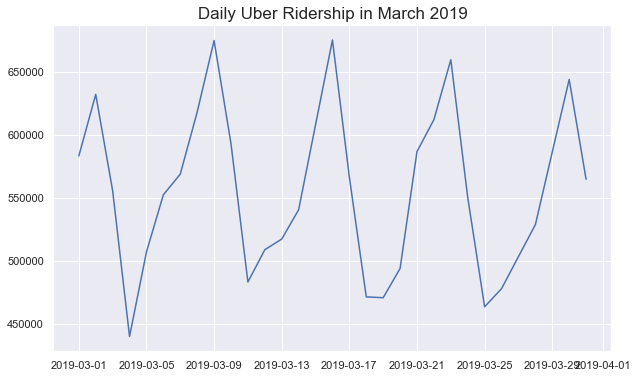

In [24]:
plt.figure(figsize = (10,6))
plt.plot(uber_daily['date'],uber_daily['pickup_datetime'])
plt.title('Daily Uber Ridership in March 2019', fontsize=17)

Text(0.5, 1.0, 'Day of the week Uber Ridership in March 2019')

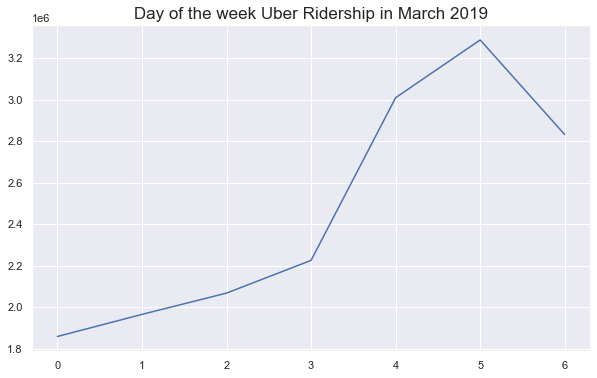

In [25]:
plt.figure(figsize = (10,6))
plt.plot(uber_day['DOW'],uber_day['pickup_datetime'])
plt.title('Day of the week Uber Ridership in March 2019', fontsize=17)

Text(0.5, 1.0, 'Hourly Uber Ridership in March 2019')

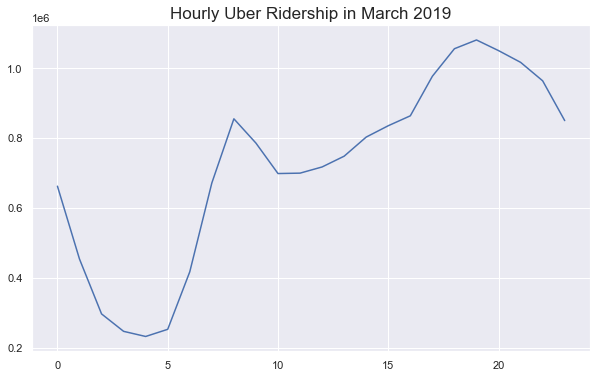

In [26]:
plt.figure(figsize = (10,6))
plt.plot(uber_hour['hour'],uber_hour['PULocationID'])
plt.title('Hourly Uber Ridership in March 2019', fontsize=17)

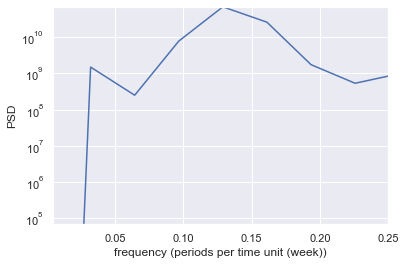

Strongest period length = 7.75


In [27]:
#finding proper period using scipy.signal.periodogram
f, PSD = scipy.signal.periodogram(uber_daily['pickup_datetime'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (week))')
plt.ylabel('PSD')
plt.xlim(0.005,0.25) #show frequencies within 1/4..1/200, periods of 4-200 weeks
plt.ylim(max(PSD)/1e6,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 2 years (approx 100 weeks) 
PSD = PSD[f>0.01]
f = f[f>0.01] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) #report the length of the strongest period

#transformting the frequency into the period length, using 1=frequency (number of periods)*period length

In [28]:
yellow_example = pd.read_csv("yellow_tripdata_2019-03.csv")

In [29]:
yellow_example

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-03-01 00:24:41,2019-03-01 00:25:31,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,0.0
1,1,2019-03-01 00:25:27,2019-03-01 00:36:37,2,3.70,1,N,95,130,1,13.0,0.5,0.5,0.70,0.00,0.3,15.00,0.0
2,1,2019-03-01 00:05:21,2019-03-01 00:38:23,1,14.10,1,N,249,28,1,41.0,3.0,0.5,10.10,5.76,0.3,60.66,2.5
3,1,2019-03-01 00:48:55,2019-03-01 01:06:03,1,9.60,1,N,138,98,2,27.0,0.5,0.5,0.00,0.00,0.3,28.30,0.0
4,1,2019-03-01 00:11:42,2019-03-01 00:16:40,1,0.80,1,N,48,48,1,5.5,3.0,0.5,3.00,0.00,0.3,12.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832540,2,2019-03-31 23:58:52,2019-04-01 00:05:04,1,0.74,1,N,186,186,1,5.5,0.5,0.5,2.33,0.00,0.3,11.63,2.5
7832541,2,2019-03-31 23:20:15,2019-03-31 23:24:12,1,1.11,1,N,263,236,2,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5
7832542,2,2019-03-31 23:32:15,2019-03-31 23:54:36,1,13.17,1,N,75,134,2,37.0,0.5,0.5,0.00,5.76,0.3,44.06,0.0
7832543,2,2019-03-31 22:32:57,2019-03-31 23:21:22,1,0.00,1,N,237,193,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2.5


In [30]:
green_example = pd.read_csv("green_tripdata_2019-03.csv")

In [31]:
print ('Uber data shape:', len(uber_example), '\nYellow taxi data shape:', \
       len(yellow_example), '\nGreen taxi data shape:', len(green_example),\
       '\nYellow + Green taxi:', (len(yellow_example)+len(green_example)))

Uber data shape: 17248340 
Yellow taxi data shape: 7832545 
Green taxi data shape: 601102 
Yellow + Green taxi: 8433647


In [32]:
yellow_example['tpep_pickup_datetime'] = pd.to_datetime(yellow_example['tpep_pickup_datetime'])
yellow_example['hour'] = yellow_example['tpep_pickup_datetime'].dt.hour
yellow_example['date'] = yellow_example['tpep_pickup_datetime'].dt.date
yellow_example['year'] = yellow_example['tpep_pickup_datetime'].dt.year
yellow_example['DOW'] = yellow_example['tpep_pickup_datetime'].dt.dayofweek #monday = 0, sunday = 6
yellow_example['month'] = yellow_example['tpep_pickup_datetime'].dt.month

In [33]:
yellow_example.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,year,DOW,month
count,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06,7.832545e+06
mean,1.636294e+00,1.575179e+00,2.991058e+00,1.066853e+00,1.619920e+02,1.602756e+02,1.278309e+00,1.317920e+01,1.203193e+00,4.955391e-01,2.231696e+00,3.649509e-01,2.989714e-01,1.919107e+01,2.281122e+00,1.388717e+01,2.019000e+03,3.201623e+00,2.999970e+00
std,5.133681e-01,1.228348e+00,3.890174e+00,6.982373e-01,6.587539e+01,7.023628e+01,4.713274e-01,3.468291e+02,1.284208e+00,6.906023e-02,5.063092e+01,1.677116e+00,2.404854e-02,3.962275e+02,7.145868e-01,6.101294e+00,2.683648e-02,1.931062e+00,1.381555e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.470000e+02,-5.750000e+01,-5.000000e-01,-8.989000e+01,-2.500000e+01,-3.000000e-01,-4.503000e+02,-2.500000e+00,0.000000e+00,2.002000e+03,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,1.000000e+01,2.019000e+03,2.000000e+00,3.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00,1.500000e+01,2.019000e+03,3.000000e+00,3.000000e+00
75%,2.000000e+00,2.000000e+00,3.050000e+00,1.000000e+00,2.310000e+02,2.330000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00,1.900000e+01,2.019000e+03,5.000000e+00,3.000000e+00
max,4.000000e+00,9.000000e+00,2.371700e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.432748e+05,2.466000e+01,7.500000e+01,1.414920e+05,8.057600e+02,1.000000e+00,1.084772e+06,4.500000e+00,2.300000e+01,2.041000e+03,6.000000e+00,1.200000e+01


In [34]:
yellow_example = yellow_example[(yellow_example.year == 2019) & (yellow_example.month == 3)]

In [35]:
yellow_hour = yellow_example.groupby(['hour']).agg({'PULocationID':'count'}).reset_index()
yellow_hour.head()

,hour,PULocationID
0,0,245785
1,1,170275
2,2,111306
3,3,88245
4,4,67251


In [36]:
yellow_dow = yellow_example.groupby(['DOW']).agg({'PULocationID':'count'}).reset_index()
yellow_dow.head()

,DOW,PULocationID
0,0,877044
1,1,1012539
2,2,1056233
3,3,1104368
4,4,1378468


In [37]:
yellow_daily = yellow_example.groupby(['date']).agg({'PULocationID':'count'}).reset_index()
yellow_daily.head()

,date,PULocationID
0,2019-03-01,281123
1,2019-03-02,251510
2,2019-03-03,221835
3,2019-03-04,208014
4,2019-03-05,267813


Text(0.5, 1.0, 'Dailly Yellow_Taxi Ridership in March 2019')

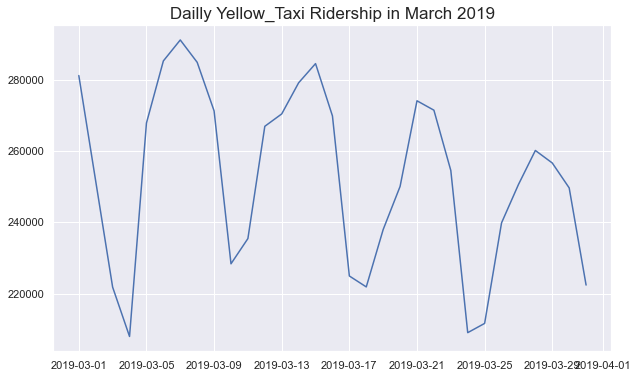

In [38]:
plt.figure(figsize = (10,6))
plt.plot(yellow_daily['date'],yellow_daily['PULocationID'])
plt.title('Dailly Yellow_Taxi Ridership in March 2019', fontsize=17)

Text(0.5, 1.0, 'Day of the week Yellow_Taxi Ridership in March 2019')

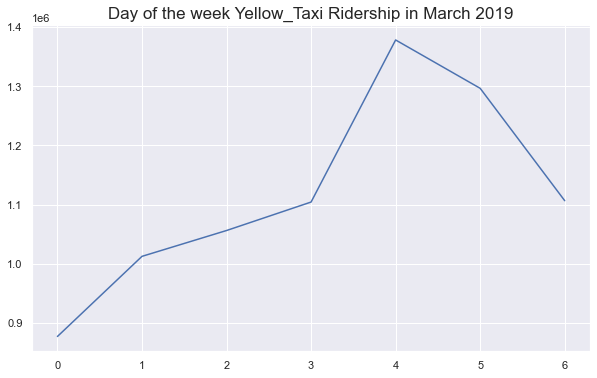

In [39]:
plt.figure(figsize = (10,6))
plt.plot(yellow_dow['DOW'],yellow_dow['PULocationID'])
plt.title('Day of the week Yellow_Taxi Ridership in March 2019', fontsize=17)

Text(0.5, 1.0, 'Hourly Yellow_taxi Ridership in March 2019')

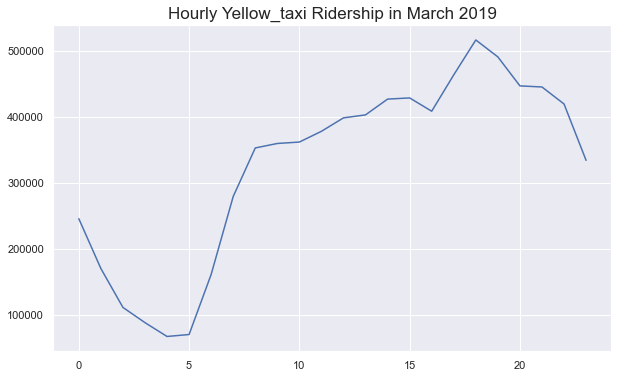

In [40]:
plt.figure(figsize = (10,6))
plt.plot(yellow_hour['hour'],yellow_hour['PULocationID'])
plt.title('Hourly Yellow_taxi Ridership in March 2019', fontsize=17)

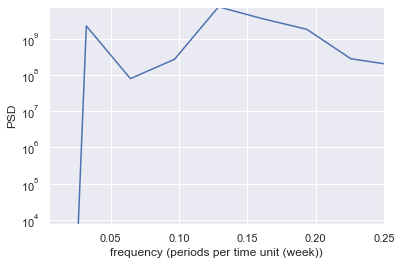

Strongest period length = 7.75


In [41]:
#finding proper period using scipy.signal.periodogram
f, PSD = scipy.signal.periodogram(yellow_daily['PULocationID'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (week))')
plt.ylabel('PSD')
plt.xlim(0.005,0.25) #show frequencies within 1/4..1/200, periods of 4-200 weeks
plt.ylim(max(PSD)/1e6,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 2 years (approx 100 weeks) 
PSD = PSD[f>0.01]
f = f[f>0.01] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) #report the length of the strongest period

#transformting the frequency into the period length, using 1=frequency (number of periods)*period length

In [43]:
taxi_zone = gpd.read_file('taxi_zones.shp')

In [45]:
taxi_zone

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [46]:
uber_zone = taxi_zone.merge(uber_example, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')

In [47]:
uber_zone

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,hour,date,year,DOW
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",HV0003,B02883,2019-03-01 06:54:31,2019-03-01 07:21:29,1.0,1.0,NaN,6.0,2019-03-01,2019.0,4.0
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",HV0003,B02883,2019-03-01 07:28:04,2019-03-01 07:38:25,1.0,1.0,NaN,7.0,2019-03-01,2019.0,4.0
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",HV0003,B02883,2019-03-01 07:41:44,2019-03-01 07:52:58,1.0,1.0,NaN,7.0,2019-03-01,2019.0,4.0
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",HV0003,B02883,2019-03-01 07:57:11,2019-03-01 08:10:32,1.0,1.0,NaN,7.0,2019-03-01,2019.0,4.0
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",HV0003,B02869,2019-03-01 07:38:57,2019-03-01 08:18:53,1.0,1.0,NaN,7.0,2019-03-01,2019.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17291958,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",HV0003,B02871,2019-03-31 23:17:03,2019-03-31 23:36:41,263.0,244.0,NaN,23.0,2019-03-31,2019.0,6.0
17291959,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",HV0003,B02888,2019-03-31 23:24:51,2019-03-31 23:30:16,263.0,75.0,1.0,23.0,2019-03-31,2019.0,6.0
17291960,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",HV0003,B02869,2019-03-31 23:15:45,2019-03-31 23:21:50,263.0,74.0,1.0,23.0,2019-03-31,2019.0,6.0
17291961,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",HV0003,B02869,2019-03-31 23:15:52,2019-03-31 23:19:31,263.0,75.0,1.0,23.0,2019-03-31,2019.0,6.0
